# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [260]:
import pandas as pd
import numpy as np

In [261]:
data = pd.read_csv('bc2.csv')

In [262]:
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [263]:
print("Number of rows = {0}\nNumber of Columns={1}\nNumber of Records={2}".format(data.shape[0],data.shape[1],data.shape[0]*data.shape[1]))

Number of rows = 699
Number of Columns=11
Number of Records=7689


In [264]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

<b> Data Type of "Bare Nuclei"column is object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [265]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<b>"Bare Nuclei" column is not displayed as its data type is not numeric.It should be converted to numeric type.

In [266]:
#Convert it to Numeric Type
#data['Bare Nuclei']=pd.to_numeric(data['Bare Nuclei'], errors='ignore')

### Check Missing Values

In [267]:
#Check for Null or missing value
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [268]:
#Count Number of Question Marks
data['Bare Nuclei'].value_counts()['?']

16

In [269]:
data.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [270]:
data.replace('?',data.describe(include='all').loc['top']['Bare Nuclei'],inplace=True)

### Print and plot the distribution of target variable (Class - using Histogram) 

In [271]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

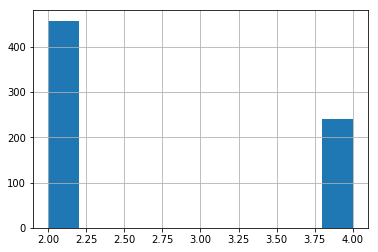

In [272]:
#Plot Histogram
data['Class'].hist()

### convert the datatype of Bare Nuclei to `int`

In [276]:
data['Bare Nuclei']=data['Bare Nuclei'].astype(int)

In [277]:
data['Bare Nuclei'].dtype

dtype('int32')

### Standardization of Data (Use Standard Scaler)

In [278]:
from sklearn import preprocessing

In [281]:
#drop ID column
data.drop('ID',axis=1,inplace=True)

In [282]:
data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [283]:
data_scaled=preprocessing.StandardScaler(data)

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000DF0135EC18>,
      dtype=object)

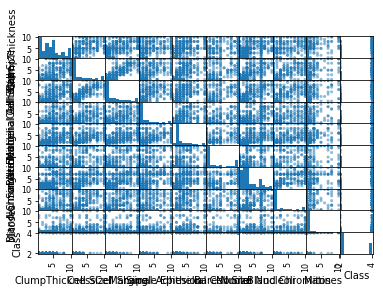

In [284]:
pd.scatter_matrix(data)

### Divide the dataset into feature set and target set

In [292]:
feature=data.iloc[:,0:data.shape[1]-1]
feature.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [297]:
target=pd.DataFrame(data.iloc[:,data.shape[1]-1])
target.head()

,Class
0,2
1,2
2,2
3,2
4,2


### Divide the Training and Test sets in 70:30 

In [298]:
from sklearn.model_selection import train_test_split

In [321]:
X_train,X_test,Y_train,Y_test=train_test_split(feature,target,test_size=0.3,random_state=0)

### Model 1 : Implement a default Decision Tree model with no attributes

In [322]:
from sklearn.tree import DecisionTreeClassifier

In [323]:
dt=DecisionTreeClassifier(criterion = 'entropy' ,random_state=0)

In [324]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [325]:
dt.feature_importances_

array([0.02520824, 0.72011263, 0.02654943, 0.01231849, 0.01593082,
       0.14164768, 0.01366531, 0.0445674 , 0.        ])

### Check the training & test accuracy of model 1 

In [326]:
from sklearn import metrics

In [330]:
Y_pred=dt.predict(X_test)
dt_acc=metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy Score is {0}".format(dt_acc))

Accuracy Score is 0.9285714285714286


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [328]:
dt1=DecisionTreeClassifier(criterion = 'entropy' ,random_state=0,max_depth=10,max_leaf_nodes=5)
dt1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### Check the training & test accuracy of model 2

In [329]:
Y_pred_dt1=dt1.predict(X_test)
dt1_acc=metrics.accuracy_score(Y_test,Y_pred_dt1)
print("Accuracy Score is {0}".format(dt1_acc))

Accuracy Score is 0.9476190476190476


### Print the confusion matrix of model 1 and model 2

In [332]:
cm1=metrics.confusion_matrix(Y_test,Y_pred)
print(cm1)

[[125  10]
 [  5  70]]


In [333]:
cm2=cm2=metrics.confusion_matrix(Y_test,Y_pred_dt1)
print(cm2)

[[126   9]
 [  2  73]]
